In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
print(df.head())
print(df['Occurrence_Category'].isnull().sum())
# remove missing values from a specific column
df.dropna(subset=['Occurrence_Category'], inplace=True)

   Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Resisted_

In [2]:
# create a new continuous variable - the likelihood of strip-searched in each Occurrence_Category
# group the data by Occurrence_Category and count the occurrences of each category
strip_search_counts = df.groupby("Occurrence_Category")["StripSearch"].sum()
#print(strip_search_counts)
total_strip_searches = df["StripSearch"].sum()
print(total_strip_searches)
# calculate the likelihood of being strip-searched in each occurrence category
occurrence_counts = df.groupby("Occurrence_Category").size()
occurrence_strip_search_likelihoods = strip_search_counts / occurrence_counts
print(occurrence_strip_search_likelihoods)
# add the new column of occurrence_strip_search_likelihoods to the dataframe and matching the occurrence category
df["Occurrence_Category_Strip_Search_Likelihood"] = df["Occurrence_Category"].map(occurrence_strip_search_likelihoods)
print(df["Occurrence_Category_Strip_Search_Likelihood"].head(10))

7800
Occurrence_Category
Assault                                            0.013461
Assault & Other crimes against persons             0.197236
Break & Enter                                      0.462882
Break and Enter                                    0.040323
Crimes against Children                            0.000000
Drug Related                                       0.391494
FTA/FTC, Compliance Check & Parollee               0.319835
FTA/FTC/Compliance Check/Parollee                  0.021196
Fraud                                              0.002110
Harassment & Threatening                           0.205836
Harassment/Threatening                             0.006686
Homicide                                           0.041096
Impaired                                           0.005140
LLA                                                0.001706
Mental Health                                      0.008368
Mischief                                           0.015129
Mischief & Frau

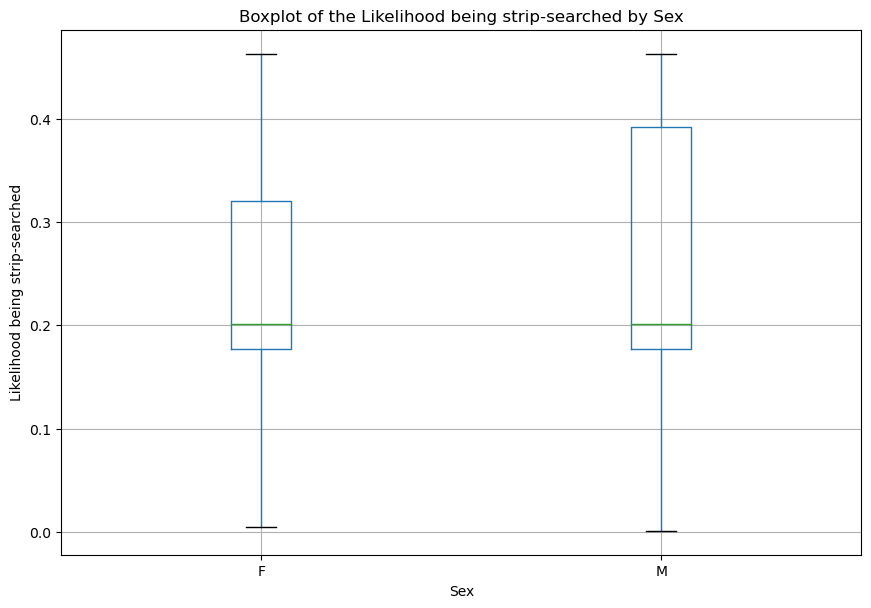

    Occurrence_Category_Strip_Search_Likelihood                                \
                                          count      mean       std       min   
Sex                                                                             
F                                        1283.0  0.245305  0.112956  0.005140   
M                                        6517.0  0.252466  0.119566  0.001059   

                                             
          25%       50%       75%       max  
Sex                                          
F    0.177074  0.201596  0.319835  0.462882  
M    0.177074  0.201596  0.391494  0.462882  
t-statistic: 2.0554354098057157
p-value: 0.0399739624433901


In [3]:
# RQ1 How sex(gender) affects the likelihood of being strip-searched in the each occurrence category
# Create a boxplot of Occurrence_Category_Strip_Search_Likelihood for each gender
sex_strip_search = df.loc[df['StripSearch'] == 1, ['Sex','Occurrence_Category_Strip_Search_Likelihood']]
import matplotlib.pyplot as plt
sex_strip_search.boxplot(column = "Occurrence_Category_Strip_Search_Likelihood", by = "Sex",figsize =(10, 7))
plt.title("Boxplot of the Likelihood being strip-searched by Sex")
plt.xlabel("Sex")
plt.ylabel("Likelihood being strip-searched")
plt.suptitle("")
plt.show()

# run t-test for sex and Occurrence_Category_Strip_Search_Likelihood
from scipy import stats

grouped = sex_strip_search.groupby('Sex')
summary = grouped.describe()
print(summary)

# Extract the Strip Search Likelihood values for each group
male_likelihoods = grouped.get_group('M')['Occurrence_Category_Strip_Search_Likelihood']
female_likelihoods = grouped.get_group('F')['Occurrence_Category_Strip_Search_Likelihood']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(male_likelihoods, female_likelihoods, equal_var=False)
# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

4


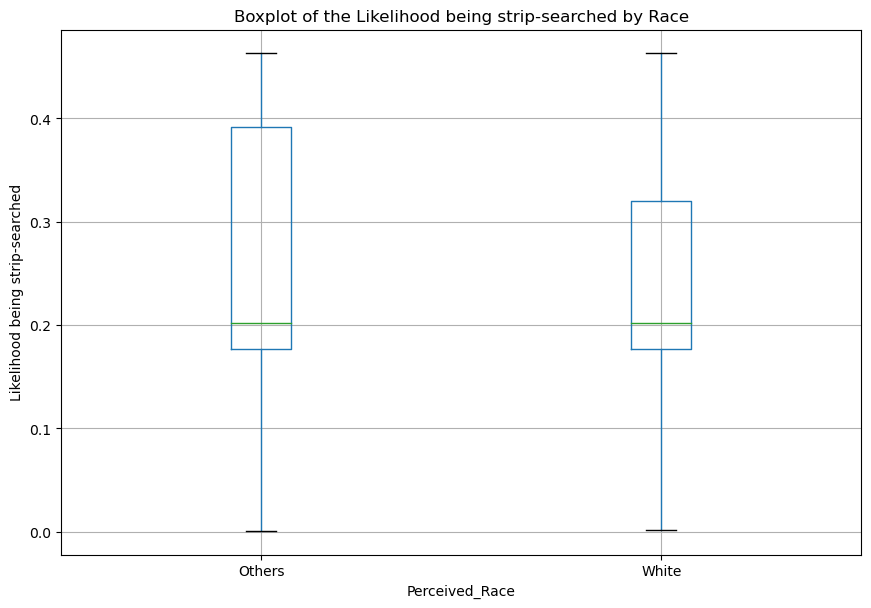

               Occurrence_Category_Strip_Search_Likelihood            \
                                                     count      mean   
Perceived_Race                                                         
Others                                              4233.0  0.251391   
White                                               3566.0  0.251179   

                                                                            
                     std       min       25%       50%       75%       max  
Perceived_Race                                                              
Others          0.116320  0.001059  0.177074  0.201596  0.391494  0.462882  
White           0.121124  0.002110  0.177074  0.201596  0.319835  0.462882  
t-statistic: -0.07841619141073725
p-value: 0.9374990968539462


In [4]:
# RQ2 How perceived_Race affects the likelihood of being strip-searched in the each occurrence category
print(df['Perceived_Race'].isnull().sum())
# remove missing values from a specific column
df.dropna(subset=['Perceived_Race'], inplace=True)

df['Perceived_Race'] = df['Perceived_Race'].replace(
    ['Black', 'East/Southeast Asian', 'Indigenous',
    'Latino', 'Middle-Eastern', 'South Asian', 'Unknown or Legacy'], 'Others')

race_strip_search = df.loc[df['StripSearch'] == 1, ['Perceived_Race','Occurrence_Category_Strip_Search_Likelihood']]
import matplotlib.pyplot as plt
race_strip_search.boxplot(column="Occurrence_Category_Strip_Search_Likelihood", by="Perceived_Race",figsize =(10, 7))
plt.title("Boxplot of the Likelihood being strip-searched by Race")
plt.xlabel("Perceived_Race")
plt.ylabel("Likelihood being strip-searched")
plt.suptitle("")
plt.show()

# run t-test for race(white&black) and Occurrence_Category_Strip_Search_Likelihood
grouped = race_strip_search.groupby('Perceived_Race')
summary = grouped.describe()
print(summary)
grouped_race = race_strip_search.groupby('Perceived_Race')
white = grouped_race.get_group('White')['Occurrence_Category_Strip_Search_Likelihood']
others = grouped_race.get_group('Others')['Occurrence_Category_Strip_Search_Likelihood']
t_statistic, p_value= stats.ttest_ind(white, others, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)



24


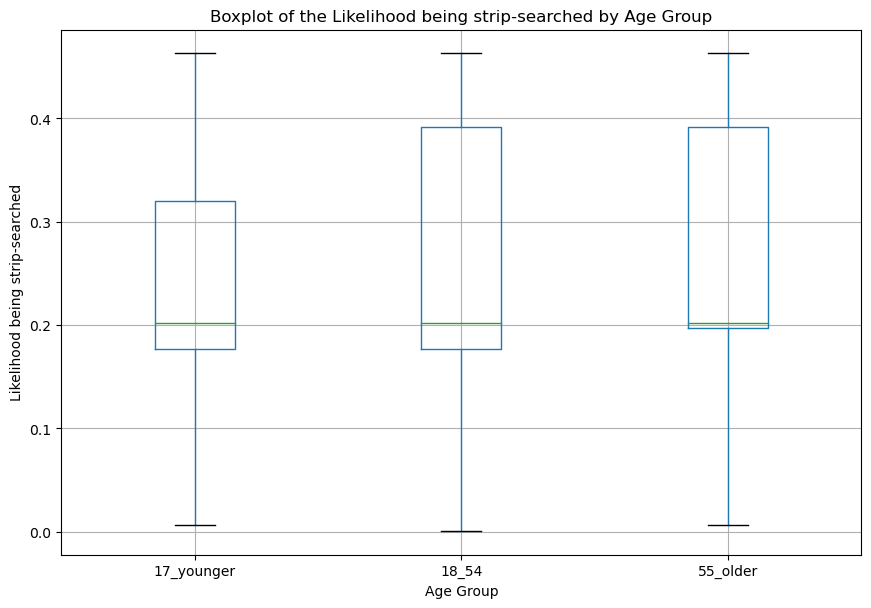

                      Occurrence_Category_Strip_Search_Likelihood            \
                                                            count      mean   
Age_group__at_arrest_                                                         
17_younger                                                  280.0  0.246568   
18_54                                                      7121.0  0.251112   
55_older                                                    398.0  0.257880   

                                                                         \
                            std       min       25%       50%       75%   
Age_group__at_arrest_                                                     
17_younger             0.111083  0.006686  0.177074  0.201596  0.319835   
18_54                  0.119130  0.001059  0.177074  0.201596  0.391494   
55_older               0.112780  0.006510  0.197236  0.201596  0.391494   

                                 
                            max  
Age_gr

In [5]:
# RQ3 How Age_group affects the likelihood of being strip-searched in the each occurrence category
print(df['Age_group__at_arrest_'].isnull().sum())
# remove missing values from a specific column
df.dropna(subset=['Age_group__at_arrest_'], inplace=True)

df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(
    ['Aged 17 years and under', 'Aged 17 years and younger'], '17_younger')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(
    ['Aged 18 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 44 years',
    'Aged 45 to 54 years'], '18_54')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(
    ['Aged 55 to 64 years', 'Aged 65 and older', 'Aged 65 years and older'], '55_older')
age_strip_search = df.loc[df['StripSearch'] == 1, ['Age_group__at_arrest_','Occurrence_Category_Strip_Search_Likelihood']]
import matplotlib.pyplot as plt
age_strip_search.boxplot(column="Occurrence_Category_Strip_Search_Likelihood", by="Age_group__at_arrest_",figsize =(10, 7))
plt.title("Boxplot of the Likelihood being strip-searched by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Likelihood being strip-searched")
plt.suptitle("")
plt.show()

# run t-test for age and Occurrence_Category_Strip_Search_Likelihood
grouped = age_strip_search.groupby('Age_group__at_arrest_')
summary = grouped.describe()
print(summary)

grouped_age = age_strip_search.groupby('Age_group__at_arrest_')
Age_17_younger = grouped_age.get_group('17_younger')['Occurrence_Category_Strip_Search_Likelihood']
Age_18_54 = grouped_age.get_group('18_54')['Occurrence_Category_Strip_Search_Likelihood']
t_statistic, p_value= stats.ttest_ind(Age_17_younger, Age_18_54, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Age_17_younger = grouped_age.get_group('17_younger')['Occurrence_Category_Strip_Search_Likelihood']
Age_55_older = grouped_age.get_group('55_older')['Occurrence_Category_Strip_Search_Likelihood']
t_statistic, p_value= stats.ttest_ind(Age_17_younger, Age_55_older, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Age_18_54 = grouped_age.get_group('18_54')['Occurrence_Category_Strip_Search_Likelihood']
Age_55_older = grouped_age.get_group('55_older')['Occurrence_Category_Strip_Search_Likelihood']
t_statistic, p_value= stats.ttest_ind(Age_18_54, Age_55_older, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

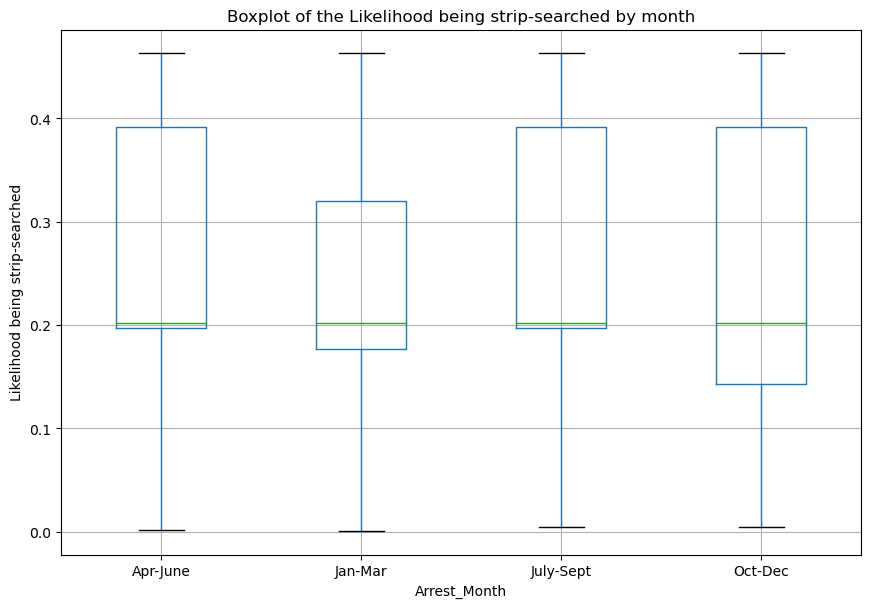

             Occurrence_Category_Strip_Search_Likelihood                      \
                                                   count      mean       std   
Arrest_Month                                                                   
Apr-June                                          1959.0  0.256089  0.119302   
Jan-Mar                                           2983.0  0.242870  0.114524   
July-Sept                                         2382.0  0.259497  0.117015   
Oct-Dec                                            475.0  0.243295  0.141828   

                                                                
                   min       25%       50%       75%       max  
Arrest_Month                                                    
Apr-June      0.001706  0.197236  0.201596  0.391494  0.462882  
Jan-Mar       0.001059  0.177074  0.201596  0.319835  0.462882  
July-Sept     0.005140  0.197236  0.201596  0.391494  0.462882  
Oct-Dec       0.005140  0.142610  0.201596  0.391

In [6]:
# RQ4 How season affects the likelihood of being strip-searched in the each occurrence category

month_strip_search = df.loc[df['StripSearch'] == 1, ['Arrest_Month','Occurrence_Category_Strip_Search_Likelihood']]
import matplotlib.pyplot as plt
month_strip_search.boxplot(column="Occurrence_Category_Strip_Search_Likelihood", by="Arrest_Month",figsize =(10, 7))
plt.title("Boxplot of the Likelihood being strip-searched by month")
plt.xlabel("Arrest_Month")
plt.ylabel("Likelihood being strip-searched")
plt.suptitle("")
plt.show()

# run t-test for race(white&black) and Occurrence_Category_Strip_Search_Likelihood
grouped = month_strip_search.groupby('Arrest_Month')
summary = grouped.describe()
print(summary)
grouped_month = month_strip_search.groupby('Arrest_Month')
month_Apr_June = grouped_month.get_group('Apr-June')['Occurrence_Category_Strip_Search_Likelihood']
month_Jan_Mar = grouped_month.get_group('Jan-Mar')['Occurrence_Category_Strip_Search_Likelihood']
t_statistic, p_value= stats.ttest_ind(month_Apr_June, month_Jan_Mar, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# one-way anova & Tukey's HSD
from scipy.stats import f_oneway

month_Apr_June = grouped_month.get_group('Apr-June')['Occurrence_Category_Strip_Search_Likelihood']
month_Jan_Mar = grouped_month.get_group('Jan-Mar')['Occurrence_Category_Strip_Search_Likelihood']
month_July_Sept = grouped_month.get_group('July-Sept')['Occurrence_Category_Strip_Search_Likelihood']
month_Oct_Dec = grouped_month.get_group('Oct-Dec')['Occurrence_Category_Strip_Search_Likelihood']

statistic, pvalue = f_oneway(month_Apr_June, month_Jan_Mar, 
                             month_July_Sept, month_Oct_Dec)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

#1 way anova with tukey hsd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=np.concatenate([month_Apr_June, month_Jan_Mar, month_July_Sept, month_Oct_Dec]),     
                         groups=np.array(['month_Apr_June']*len(month_Apr_June) + ['month_Jan_Mar']*len(month_Jan_Mar) + ['month_July_Sept']*len(month_July_Sept) + ['month_Oct_Dec']*len(month_Oct_Dec)),
                         alpha=0.05)
print(tukey)


                                                 sum_sq       df          F  \
C(Age_group__at_arrest_)                       1.305639      2.0  41.488567   
C(Perceived_Race)                              0.114509      1.0   7.277386   
C(Age_group__at_arrest_):C(Perceived_Race)     0.068630      2.0   2.180817   
Residual                                    1023.982003  65077.0        NaN   

                                                  PR(>F)  
C(Age_group__at_arrest_)                    9.845139e-19  
C(Perceived_Race)                           6.984606e-03  
C(Age_group__at_arrest_):C(Perceived_Race)  1.129575e-01  
Residual                                             NaN  
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2     meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
17_youngerOthers 17_youngerWhite  -0.0068 0.7364 -0.0209  0.0072  False
17_youngerOthers     

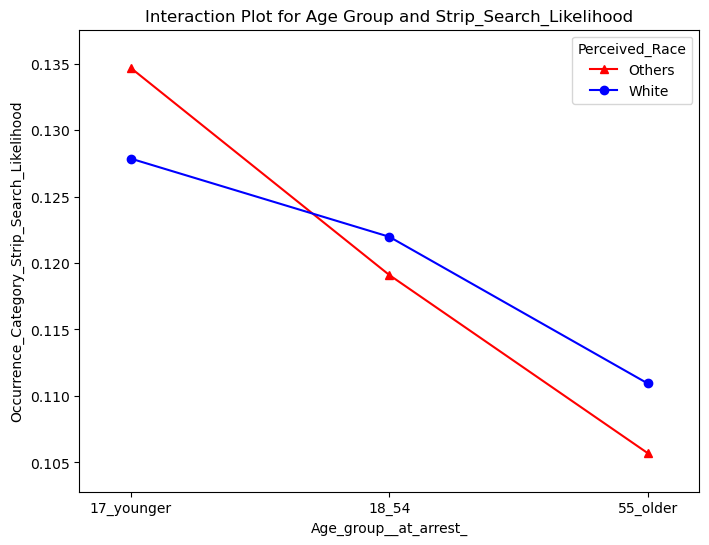

In [7]:
# two-way ANOVA & Tukey's HSD
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Occurrence_Category_Strip_Search_Likelihood ~ C(Age_group__at_arrest_) + C(Perceived_Race) + C(Age_group__at_arrest_):C(Perceived_Race)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# run the Tukey test for the interaction between A and B
tukey_results = pairwise_tukeyhsd(df['Occurrence_Category_Strip_Search_Likelihood'], df['Age_group__at_arrest_'] + df['Perceived_Race'])
print(tukey_results)

#interation plots in two-way ANOVA
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(8, 6))
interaction_plot(df['Age_group__at_arrest_'], df['Perceived_Race'], df['Occurrence_Category_Strip_Search_Likelihood'], 
                 colors=['red', 'blue'], markers=['^', 'o'], ax=ax)
# Add labels and title
ax.set_xlabel('Age_group__at_arrest_')
ax.set_ylabel('Occurrence_Category_Strip_Search_Likelihood')
ax.set_title('Interaction Plot for Age Group and Strip_Search_Likelihood')

plt.show()